# Part 1:

Null hypothesis: Both people in groups A and B clicked the ads once. 
(H0): pA = pB


Alternative hypothesis: Group B people clicked the ad more times that group A. 
(H1): pB > pA

Z=2.24 
p-value = 0.0125

At the 5% significance level (𝛼=0.05), the p-value (0.0125) is less than 0.05, so we reject the null hypothesis H0. This suggests that ad B has a statistically significantly higher clicks per person rate than ad A.


At the 1% significance level (α=0.01), the p-value (0.0125) is greater than 0.01, so we fail to reject the null hypothesis H0. This suggests that there is not enough evidence to conclude that ad B has a significantly higher clicks per person rate than ad A at the 1% significance level.

If B has 560 clicks:
Z= 2.69
p-value= 0.0036
If has 570 clicks:
Z=3.13
p-value= 0.0009


# Part 2:

Task 1: Import the data


In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Import the data
real_estate1 = pd.read_csv('realEstate1.csv')
real_estate2 = pd.read_csv('realEstate2.csv')

# Concatenate the dataframes
df = pd.concat([real_estate1, real_estate2], ignore_index=True)
print(df.head())


    ListNo    Access  AdditInfo  Acres             ListAgt  \
0  1397571  Concrete        NaN   0.29          Liz Slager   
1  1394021   Asphalt        NaN   0.01      Angela Carlson   
2  1393604       NaN        NaN   0.11     Rachel Kitterer   
3  1393602  Concrete        NaN   0.14     Rachel Kitterer   
4  1393829   Asphalt        NaN   0.01  T. Carter Maudsley   

                 AirType                                          Amenities  \
0  Central Air; Electric  See Remarks; Cable Tv Available; Cable Tv Wire...   
1  Central Air; Electric          Cable Tv Available; Electric Dryer Hookup   
2  Central Air; Electric              Cable Tv Wired; Electric Dryer Hookup   
3  Central Air; Electric              Cable Tv Wired; Electric Dryer Hookup   
4  Central Air; Electric                                     Cable Tv Wired   

   Area  BackDim                            Basemnt  ...  WinEvp1 WinEvp2  \
0   101      0.0  Daylight; Entrance; Full; Walkout  ...        0       0  

Task 2: Clean the data


In [99]:
# Filter houses with List Price between 200,000 and 1,000,000 dollars
df = df[(df['LstPrice'] >= 200000) & (df['LstPrice'] <= 1000000)]
# Columns to keep
columns_to_keep = ['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']
df = df[columns_to_keep]
# Convert 'TotSqf' to integer
df['TotSqf'] = df['TotSqf'].replace(',', '',regex=True).astype(int)

# Convert categorical values
df['Prop_Type_num'] = df['PropType'].apply(lambda x: 0 if x in ['Condo', 'Townhouse'] else 1)
# Remove listings with erroneous 'Longitude' and 'Taxes' values
df = df[df['Longitude'] != 0]
df = df[df['Taxes'] < 100000]  # Assuming any taxes value above 100000 is erroneous


Task 3: Exploratory data analysis


After Cleaning up the data we are left with 261 houses and 16 variables


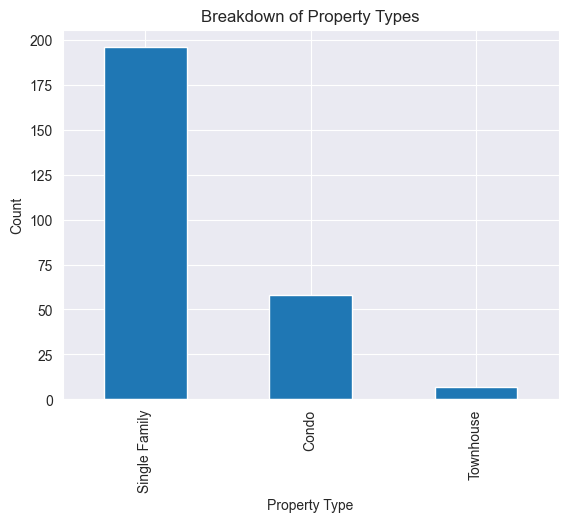

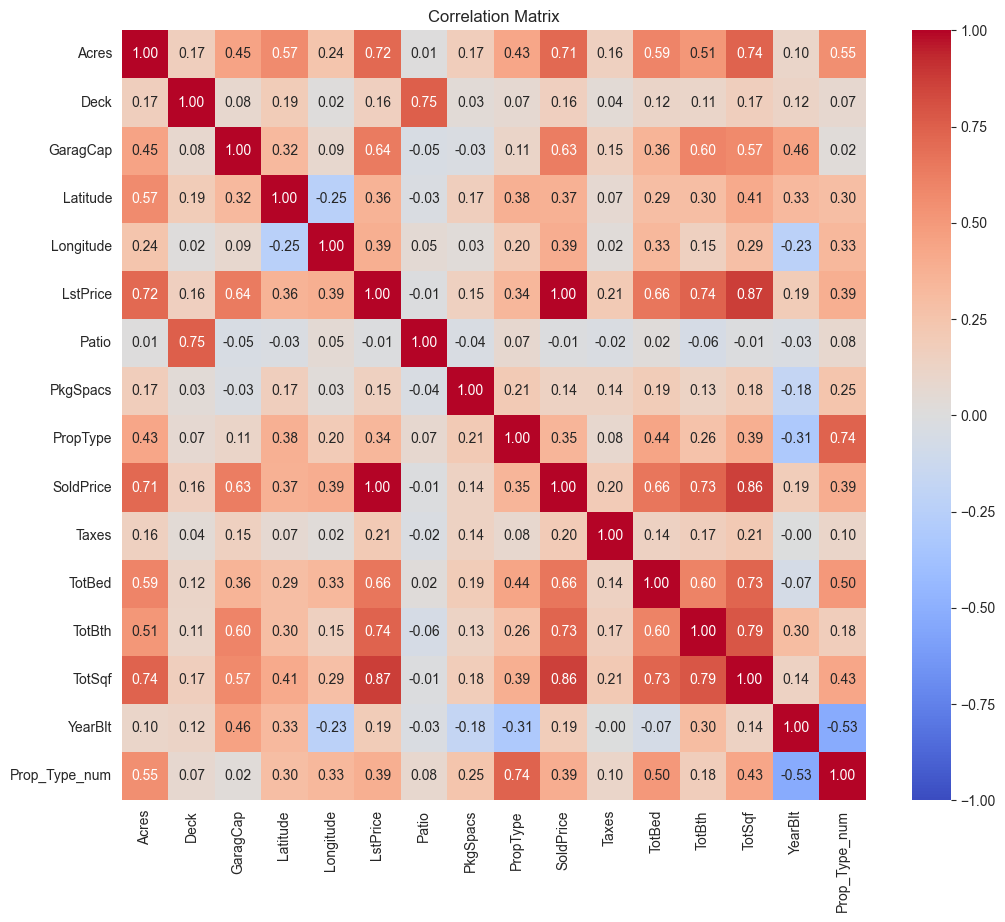

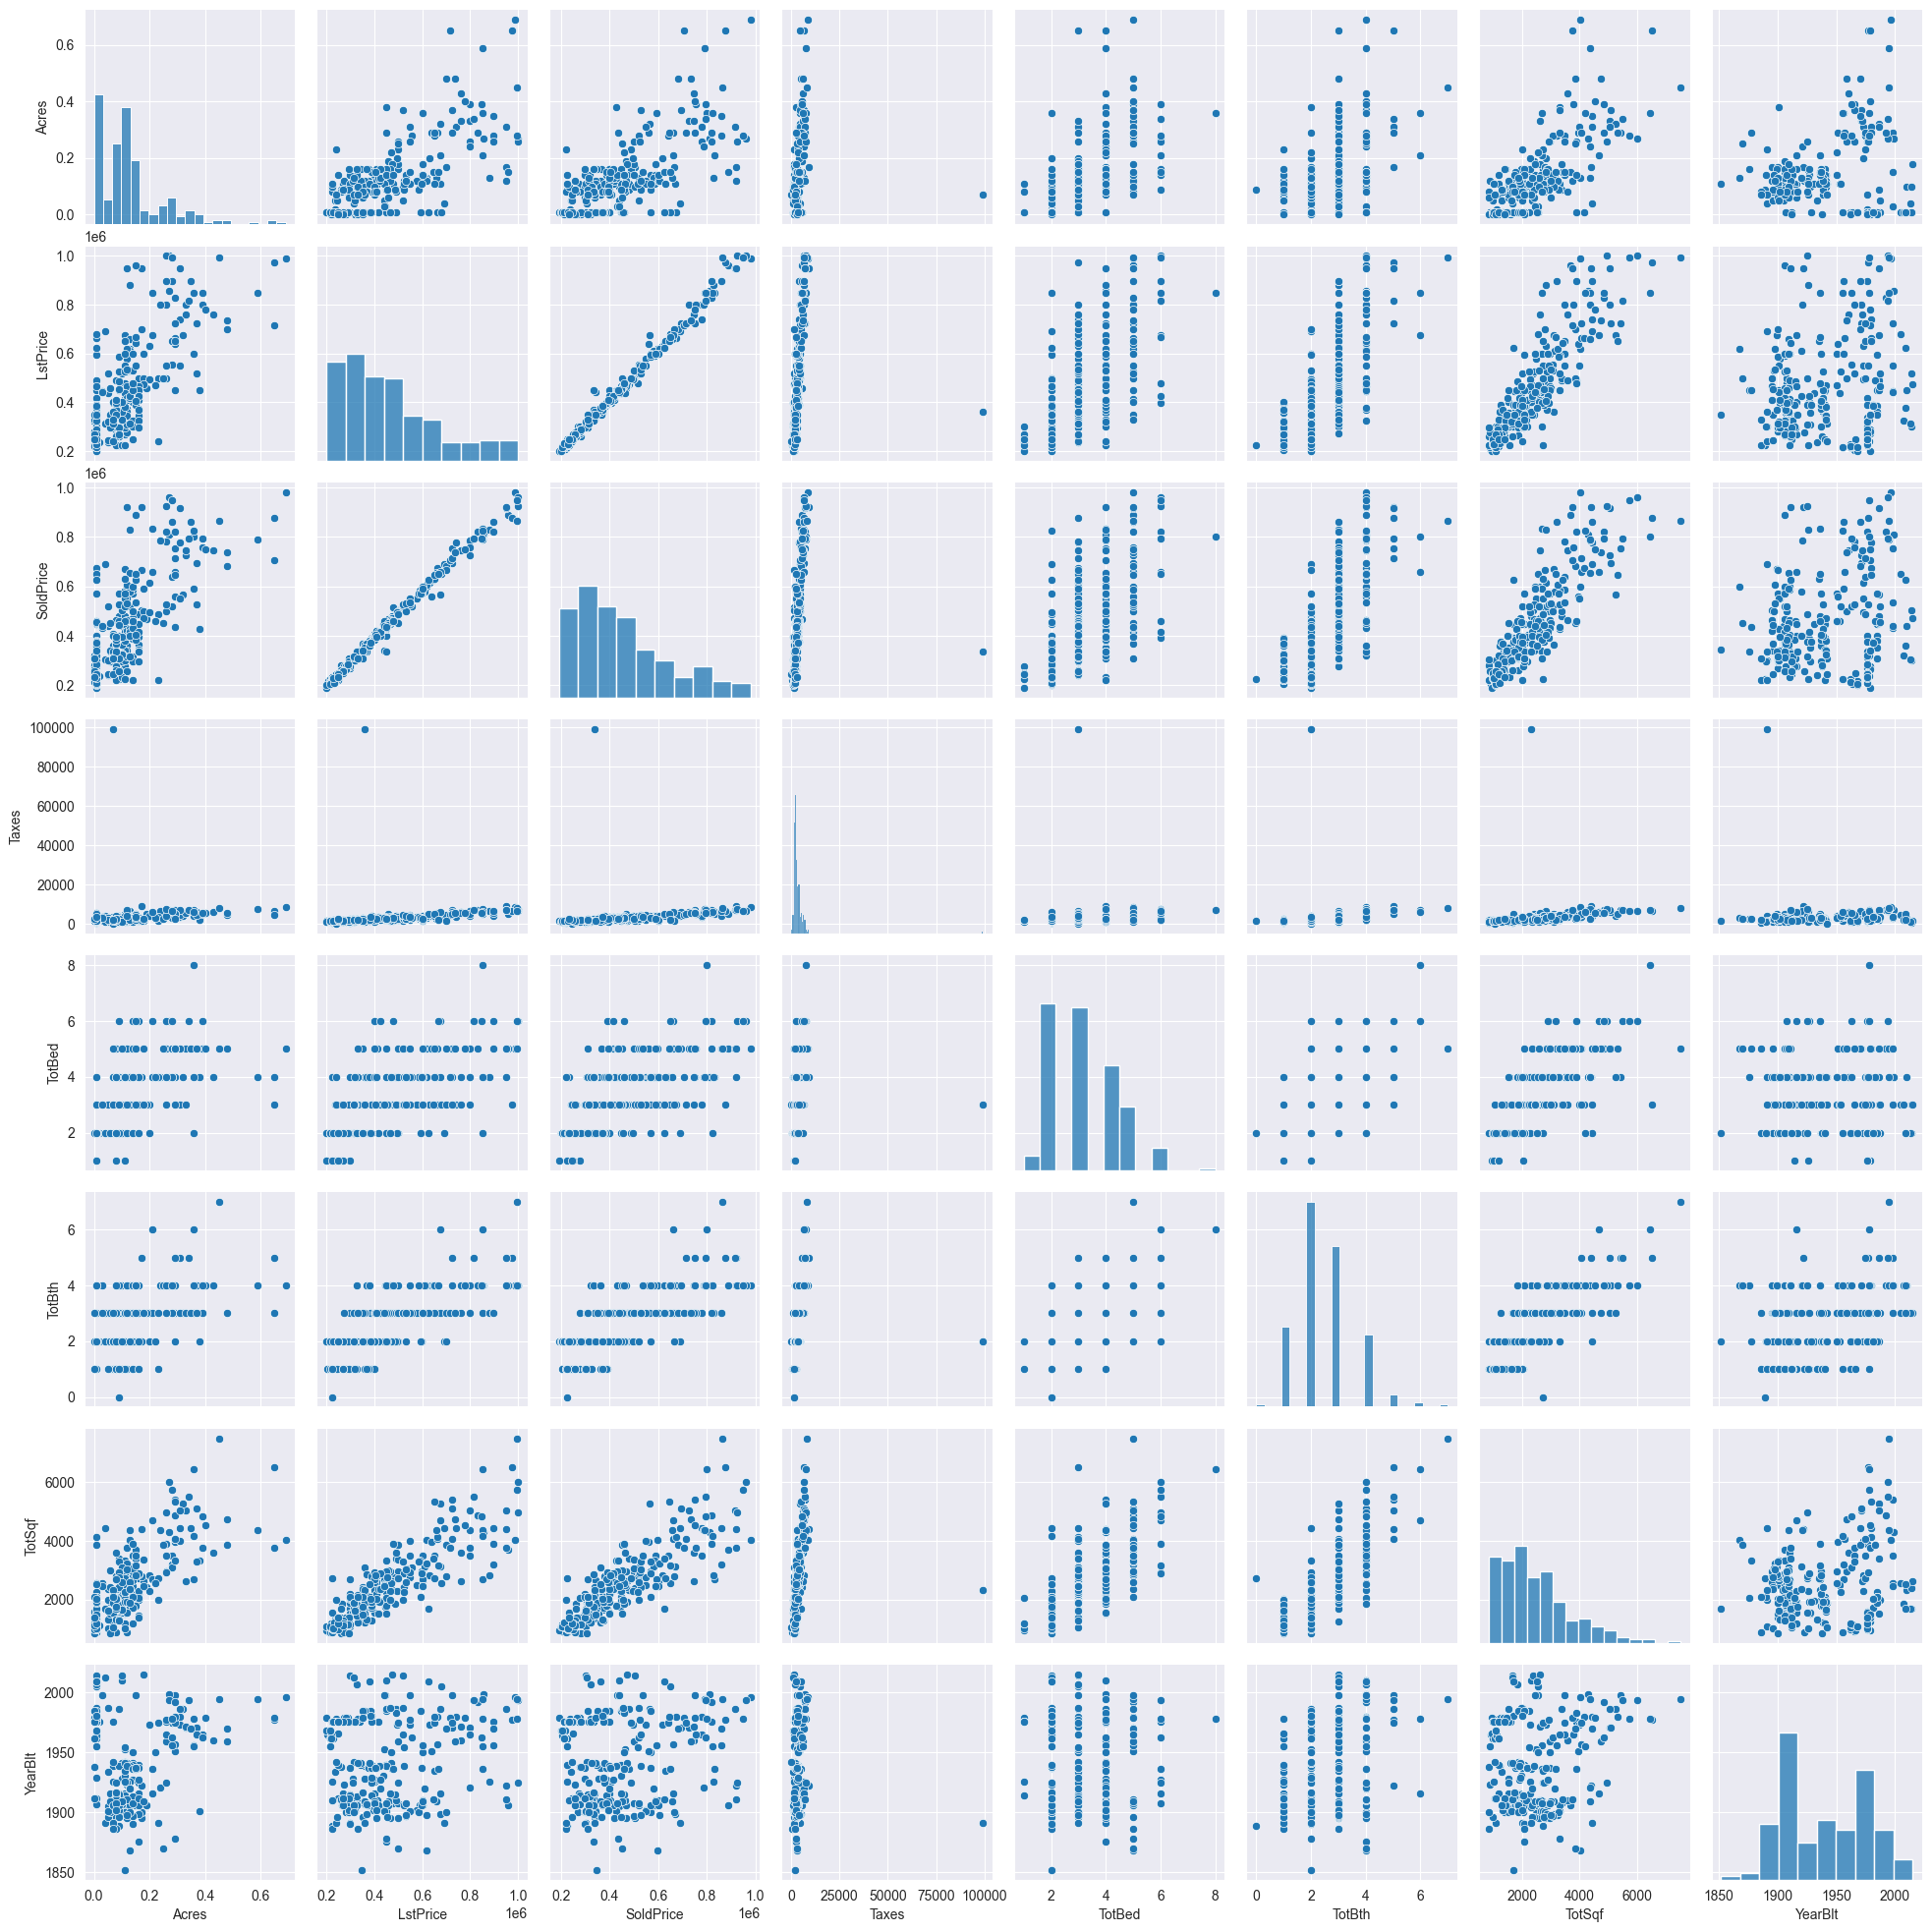

There is a strong correlation between LstPrice and SoldPrice (correlation coefficient = 0.9950892541867604)
There is a strong correlation between LstPrice and TotSqf (correlation coefficient = 0.8701209876346082)
There is a strong correlation between SoldPrice and LstPrice (correlation coefficient = 0.9950892541867604)
There is a strong correlation between SoldPrice and TotSqf (correlation coefficient = 0.8599810859394662)
There is a strong correlation between TotBth and TotSqf (correlation coefficient = 0.7890516353791962)
There is a strong correlation between TotSqf and LstPrice (correlation coefficient = 0.8701209876346083)
There is a strong correlation between TotSqf and SoldPrice (correlation coefficient = 0.8599810859394662)
There is a strong correlation between TotSqf and TotBth (correlation coefficient = 0.7890516353791963)


In [100]:


# Describe the dataset
# print("After Cleaning up the data we are left with "+str(df.shape[0]) +" houses and " +str(df.shape[1])+" variables")
# df['PropType'].value_counts().plot(kind='bar')
# plt.show()
# 
# #Compute the correlation matrix and use a heat map to visualize the correlation coefficients
# original_categories = df['PropType'].astype('category').cat.categories
# df['PropType'] = df['PropType'].astype('category').cat.codes
# 
# corr = df.corr()
# plt.pcolor(corr, vmin=-1, vmax=1, cmap='coolwarm')
# plt.colorbar()
# plt.xticks(range(len(corr)), corr.columns, rotation=90)
# plt.yticks(range(len(corr)), corr.columns)
# plt.show()
# 
# df['PropType'] = df['PropType'].map(dict(enumerate(original_categories)))
# 
# # Create a subset of the columns
# subset_cols = ['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']
# 
# ad_all_ols = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=advert).fit()
# ad_all_ols.summary()
# 
# # Make a scatter plot matrix
# for col1 in subset_cols:
#     for col2 in subset_cols:
#         if col1 != col2:
#             corr_coeff = df[col1].corr(df[col2])
#             if abs(corr_coeff) > 0.75:
#                 print('There is a strong correlation between {} and {} (correlation coefficient = {})'.format(col1, col2, corr_coeff))
#             plt.scatter(df[col1], df[col2], alpha=0.5)
#             plt.xlabel(col1)
#             plt.ylabel(col2)
#             plt.show()


print(f"After Cleaning up the data we are left with {df.shape[0]} houses and {df.shape[1]} variables")

# Bar chart for house types
df['PropType'].value_counts().plot(kind='bar')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Breakdown of Property Types')
plt.show()

# Compute the correlation matrix and use a heat map to visualize the correlation coefficients
original_categories = df['PropType'].astype('category').cat.categories
df['PropType'] = df['PropType'].astype('category').cat.codes

corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Restore original categories after plotting
df['PropType'] = df['PropType'].map(dict(enumerate(original_categories)))

# Create a subset of the columns
subset_cols = ['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']

# Make a scatter plot matrix
sns.pairplot(df[subset_cols])
plt.show()

# Identify strong correlations
for col1 in subset_cols:
    for col2 in subset_cols:
        if col1 != col2:
            corr_coeff = df[col1].corr(df[col2])
            if abs(corr_coeff) > 0.75:
                print(f'There is a strong correlation between {col1} and {col2} (correlation coefficient = {corr_coeff})')


Describing your findings:
There are more single family property types, and the least one being townhouses. The list and sold prices closely correlate. So as the list price increases so does the sold price. Also there is no significant relationship between taxes and year built. 

Task 4: Geospatial plot


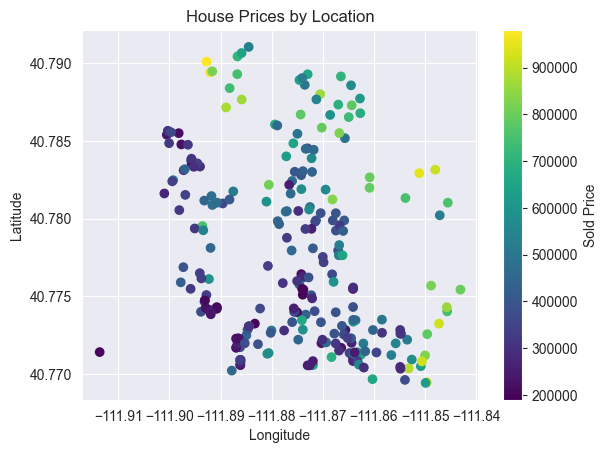

In [101]:
# Scatterplot for latitude and longitude colored by SoldPrice
plt.scatter(df['Longitude'], df['Latitude'], c=df['SoldPrice'], cmap='viridis')
plt.colorbar(label='Sold Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Prices by Location')
plt.show()


How does the price depend on the house location?
It looks like the most expensive part is probably -111.89 longitude and 40.790 latitude. That area could be in an expensive neighborhood, in a safer area, or has a lot on amenities close by. 


What can you say about the relation between the location and the house price?
It looks like the lower the latitude the more cheaper the houses are, and towards the middle of the longitude between -111.90- -111.86 is where the majority of the higher priced homes are. 



Task 5: Simple Linear Regression


                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.618e+04
Date:                Fri, 31 May 2024   Prob (F-statistic):          3.51e-262
Time:                        22:48:13   Log-Likelihood:                -2938.4
No. Observations:                 261   AIC:                             5881.
Df Residuals:                     259   BIC:                             5888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.303e+04   2943.037      4.429      0.0

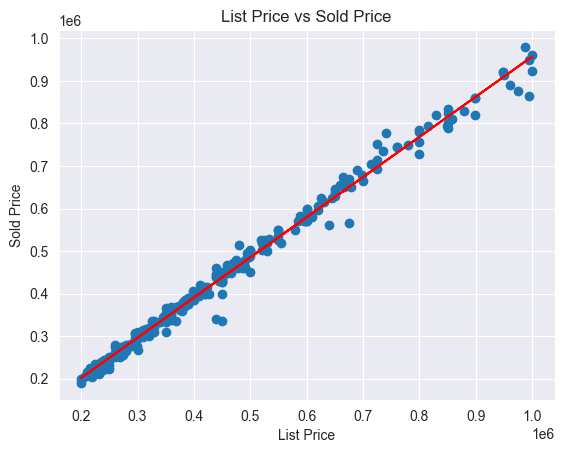

In [102]:

# Simple linear regression: SoldPrice ~ LstPrice
X = df['LstPrice']
y = df['SoldPrice']

X = sm.add_constant(X)  # Add an intercept to the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# R-squared value
print(model.summary())

# Plot of list price vs sold price
plt.scatter(df['LstPrice'], df['SoldPrice'])
plt.plot(df['LstPrice'], predictions, color='red')
plt.xlabel('List Price')
plt.ylabel('Sold Price')
plt.title('List Price vs Sold Price')
plt.show()


Task 6: Multilinear Regression


In [103]:
# Multilinear regression
X = df[['Acres', 'Deck', 'GaragCap', 'Patio', 'PkgSpacs', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']]
y = df['SoldPrice']

X = sm.add_constant(X)  # Add an intercept to the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     89.72
Date:                Fri, 31 May 2024   Prob (F-statistic):           8.07e-77
Time:                        22:48:13   Log-Likelihood:                -3343.2
No. Observations:                 261   AIC:                             6708.
Df Residuals:                     250   BIC:                             6748.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.136e+05   3.75e+05      0.570      0.5


where x_i are predictive variables. Which variables are the best predictors for the Sold Price? Acres, listprice, TotSqf, YearBlt.

Often the price per square foot for a house is advertised. Is this what the coefficient for TotSqf is measuring? Provide an interpretation for the coefficient for TotSqf.
It is measuring the total square feet in a house. The coefficient is positive so that means the more TotSqf the higher the price of the home is. 

Estimate the value that each Garage space adds to a house.


Does latitude or longitude have an impact on house price? Explain. Latitude and longitude have an impact on house price because there are some locations that are more desirable to move to than others. 


If we wanted to start a 'house flipping' company, we'd have to be able to do a better job of predicting the sold price than the list price does. How does your model compare?
It uses different variables. It also uses R2 values for the variables. The higher the higher the cost of the house will probably be. 

Task 7: Incorporating a categorical variable


                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     47.33
Date:                Fri, 31 May 2024   Prob (F-statistic):           4.50e-11
Time:                        22:48:13   Log-Likelihood:                -3520.1
No. Observations:                 261   AIC:                             7044.
Df Residuals:                     259   BIC:                             7051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           3.21e+05   2.17e+04     14.796

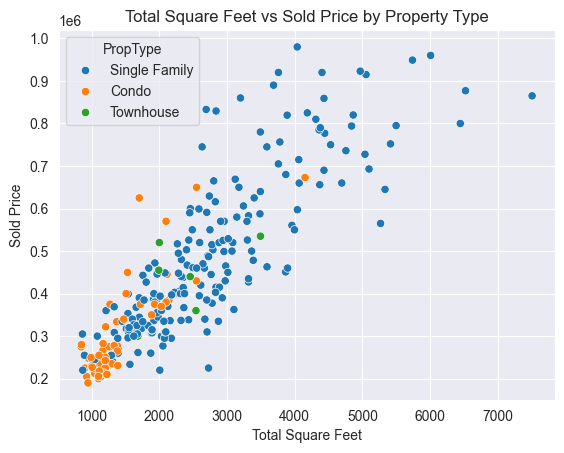

In [104]:
# Model 1
X = df['Prop_Type_num']
y = df['SoldPrice']

X = sm.add_constant(X)  # Add an intercept to the model
model1 = sm.OLS(y, X).fit()
print(model1.summary())
# Model 2
X = df[['Prop_Type_num', 'TotSqf']]
y = df['SoldPrice']

X = sm.add_constant(X)  # Add an intercept to the model
model2 = sm.OLS(y, X).fit()
print(model2.summary())
# Scatterplot colored by property type
sns.scatterplot(x='TotSqf', y='SoldPrice', hue='PropType', data=df)
plt.xlabel('Total Square Feet')
plt.ylabel('Sold Price')
plt.title('Total Square Feet vs Sold Price by Property Type')
plt.show()
